## Original Companies Dataset Overview

## Setup

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/clean_supercias_75K.csv')
df.head()

,2020,2019,EXPEDIENTE,NOMBRE,TIPO COMPAÑIA,ACTIVIDAD ECONÓMICA,REGION,PROVINCIA,CIUDAD,TAMAÑO,SECTOR,CANT. EMPLEADOS,ACTIVO2020,PATRIMONIO2020,INGRESOS POR VENTA2020,UTILIDAD ANTES DE 2020,UTILIDAD DEL EJERCICIO2020,UTILIDAD NETA2020,IR CAUSADO2020,INGRESO TOTAL2020
0,1.0,1,384.0,CORPORACION FAVORITA C.A.,ANÓNIMA,G4711.01 - VENTA AL POR MENOR DE GRAN VARIEDAD...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,MERCADO DE VALORES,10768.0,2.121860e+09,1.482973e+09,2.170603e+09,187168402.3,2.201981e+08,1.474992e+08,41971212.00,2.170603e+09
1,2.0,4,6796.0,ECUACORRIENTE,ANÓNIMA,B0729.01 - EXTRACCIÓN Y PREPARACIÓN DE MINERAL...,ORIENTE,ZAMORA CHINCHIPE ...,EL PANGUI ...,GRANDE,SOCIETARIO,966.0,1.607423e+09,5.689866e+08,0.000000e+00,-1387158.7,0.000000e+00,-2.633856e+06,1246697.02,0.000000e+00
2,3.0,3,93144.0,AURELIAN ECUADOR,ANÓNIMA,B0899.09 - EXTRACCIÓN DE OTROS MINERALES: ASBE...,ORIENTE,ZAMORA CHINCHIPE ...,LOS ENCUENTROS ...,GRANDE,SOCIETARIO,1451.0,1.599727e+09,6.052935e+08,3.587926e+08,-49399080.0,-4.939908e+07,-4.939908e+07,0.00,3.588240e+08
3,4.0,2,705547.0,SHAYA ECUADOR,ANÓNIMA,B0910.01 - ACTIVIDADES DE SERVICIOS DE EXTRACC...,SIERRA,PICHINCHA ...,QUITO ...,GRANDE,SOCIETARIO,92.0,1.354952e+09,7.868173e+08,6.690761e+08,179317070.0,2.109613e+08,1.337093e+08,45607812.10,6.690761e+08
4,5.0,5,47845.0,CONSORCIO ECUATORIANO DE TELECOMUNICACIONES CO...,ANÓNIMA,"J6120.01 - OPERACIÓN, MANTENIMIENTO O FACILITA...",COSTA,GUAYAS ...,GUAYAQUIL ...,GRANDE,SOCIETARIO,2844.0,1.217718e+09,2.647091e+08,1.066242e+09,174644376.0,2.048239e+08,1.068268e+08,67817626.00,1.071561e+09


## Categorical Review

In [3]:
# How many companies we have in the original dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75165 entries, 0 to 75164
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   2020                        75165 non-null  float64
 1   2019                        75165 non-null  object 
 2   EXPEDIENTE                  75165 non-null  float64
 3   NOMBRE                      75165 non-null  object 
 4   TIPO COMPAÑIA               75165 non-null  object 
 5   ACTIVIDAD ECONÓMICA         75165 non-null  object 
 6   REGION                      75165 non-null  object 
 7   PROVINCIA                   75165 non-null  object 
 8   CIUDAD                      75165 non-null  object 
 9   TAMAÑO                      75165 non-null  object 
 10  SECTOR                      75165 non-null  object 
 11  CANT. EMPLEADOS             75165 non-null  float64
 12  ACTIVO2020                  62489 non-null  float64
 13  PATRIMONIO2020              751

In [4]:
# How many unique company sectors there are registered?
df.SECTOR.unique()

array(['MERCADO DE VALORES', 'SOCIETARIO'], dtype=object)

In [5]:
# What are the sizing categories for companies according to SuperCias
df.TAMAÑO.unique()

array(['GRANDE', 'MEDIANA', 'MICROEMPRESA', 'PEQUEÑA'], dtype=object)

In [6]:
# What are the company types we'll be working with
df["TIPO COMPAÑIA"].unique()

array(['ANÓNIMA', 'SUCURSAL  EXTRANJERA', 'RESPONSABILIDAD LIMITADA',
       'SOCIEDAD POR ACCIONES SIMPLIFICADA', 'ASOCIACIÓN O CONSORCIO',
       'ANÓNIMA  EN PREDIOS RÚSTICOS', 'ECONOMÍA MIXTA',
       'ANÓNIMA MULTINACIONAL ANDINA', 'COMANDITA POR ACCIONES'],
      dtype=object)

In [7]:
# How are the companies distributed in between such categories
proportion = df.groupby("TAMAÑO")['NOMBRE'].count()
proportion


TAMAÑO
GRANDE           2588
MEDIANA          6124
MICROEMPRESA    47787
PEQUEÑA         18666
Name: NOMBRE, dtype: int64

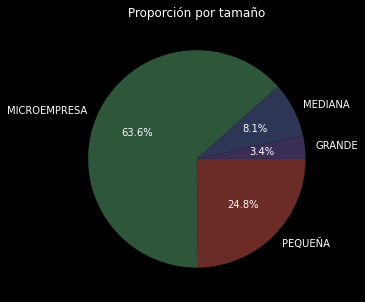

In [8]:
# Let's visualize
plot = proportion.plot.pie(y='NOMBRE', figsize=(5, 5), label="", 
colors= ["#3b2e56", "#2e3656", "#2e563b", "#6b2b26"] ,autopct='%1.1f%%', title="Proporción por tamaño")

In [9]:
# What is the impact/influence of the top companies on the Ecuadorian workforce according to the Dataset
top_1000 = df.head(1000)
rest = df[1000:]
total_emp = df["CANT. EMPLEADOS"].sum()
top_emp = top_1000["CANT. EMPLEADOS"].sum()
rest_emp = rest["CANT. EMPLEADOS"].sum()

top_perc = top_emp/total_emp
rest_perc = rest_emp/total_emp

print(top_emp, rest_emp)
print(round(top_perc, 2), round(rest_perc, 2))


349970.0 1090847.0
0.24 0.76


In [10]:
# Let's create a small DataFrame to visualize
workforce = pd.DataFrame({'EMPLEADOS': [top_emp, rest_emp]}, index=['Top_1000', 'Rest_emp'])
workforce

,EMPLEADOS
Top_1000,349970.0
Rest_emp,1090847.0


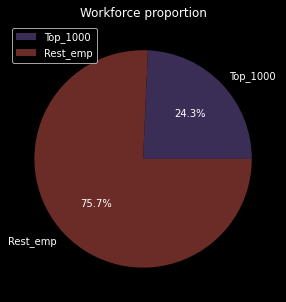

In [11]:
workplot = workforce.plot.pie(y='EMPLEADOS', figsize=(5, 5), label="", 
colors= ["#3b2e56",  "#6b2b26"] ,autopct='%1.1f%%', title="Workforce proportion")

In [12]:
# Let's take a look at the number of companies with less than 10 employees
df.loc[df["CANT. EMPLEADOS"] < 10].shape

(62178, 20)

## Numerical Review

In [13]:
# Let's check the mean and std for income column
describe_income = df['INGRESOS POR VENTA2020'].describe()
mean_income = describe_income['mean']
std_income = describe_income['std']
round(std_income, 2)

16184600.78

In [14]:
# Making sure the rows with no income (makes no sense) don't interfere with our distribution analysis to much
df.loc[df["INGRESOS POR VENTA2020"] == 0, "INGRESOS POR VENTA2020"] = mean_income

In [15]:
# How many companies reported income's above the mean
above_comp = df[df['INGRESOS POR VENTA2020'] > mean_income].shape[0]
above_comp

7151

In [16]:
# Whay is their percentaje
perc_above_avg = round((above_comp/df.shape[0]) * 100, 2)
perc_above_avg

9.51

Text(0.5, 1.0, 'Distribución de compañías por ingresos')

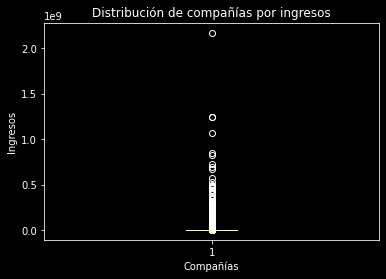

In [17]:
# Let's visualize the distribution
plt.boxplot(df['INGRESOS POR VENTA2020'])
plt.xlabel("Compañías")
plt.ylabel("Ingresos")
plt.title("Distribución de compañías por ingresos")

## Standarization and Outlier analysis

### Standarization

In [18]:
# Let's first get a z-score column for income
df['income_zscore'] = (df['INGRESOS POR VENTA2020'] - mean_income) / std_income
df['income_zscore']

0        134.037900
1          0.000000
2         22.091352
3         41.262877
4         65.802613
            ...    
75160      0.000000
75161      0.000000
75162      0.000000
75163      0.000000
75164      0.000000
Name: income_zscore, Length: 75165, dtype: float64

In [19]:
# Now let's visualize the same income distribution but with no outliers
df_no_out = df[ abs(df['income_zscore'])< 3 ]
df_no_out


,2020,2019,EXPEDIENTE,NOMBRE,TIPO COMPAÑIA,ACTIVIDAD ECONÓMICA,REGION,PROVINCIA,CIUDAD,TAMAÑO,...,CANT. EMPLEADOS,ACTIVO2020,PATRIMONIO2020,INGRESOS POR VENTA2020,UTILIDAD ANTES DE 2020,UTILIDAD DEL EJERCICIO2020,UTILIDAD NETA2020,IR CAUSADO2020,INGRESO TOTAL2020,income_zscore
1,2.0,4,6796.0,ECUACORRIENTE,ANÓNIMA,B0729.01 - EXTRACCIÓN Y PREPARACIÓN DE MINERAL...,ORIENTE,ZAMORA CHINCHIPE ...,EL PANGUI ...,GRANDE,...,966.0,1.607423e+09,568986647.0,1.252873e+06,-1387158.7,0.00,-2633855.7,1246697.02,0.00,0.000000
16,17.0,15,56871.0,INMOBILIARIA MOTKE,ANÓNIMA,"L6810.01 - COMPRA - VENTA, ALQUILER Y EXPLOTAC...",COSTA,GUAYAS ...,GUAYAQUIL ...,GRANDE,...,12.0,5.170639e+08,60910230.6,3.481724e+07,-7242367.6,-7242367.50,-7242367.6,0.00,41090495.40,2.073846
17,18.0,14,707891.0,DPWORLD POSORJA,ANÓNIMA,"F4290.11 - CONSTRUCCIÓN DE VÍAS DE NAVEGACIÓN,...",COSTA,GUAYAS ...,GUAYAQUIL ...,GRANDE,...,567.0,5.039392e+08,63840687.0,2.950014e+07,-38835253.0,-38835253.00,-38835253.0,0.00,31555039.40,1.745317
22,23.0,21,159851.0,PDVSA ECUADOR,ANÓNIMA,B0610.00 - EXTRACCIÓN DE ACEITES CRUDOS DE PET...,SIERRA,PICHINCHA ...,QUITO ...,MEDIANA,...,12.0,4.334301e+08,82505294.8,1.038048e+06,-14426970.0,-14393949.51,-14459990.0,33020.05,2781919.29,-0.013273
29,30.0,30,118480.0,AMOVECUADOR,ANÓNIMA,"J6120.01 - OPERACIÓN, MANTENIMIENTO O FACILITA...",SIERRA,PICHINCHA ...,QUITO ...,MICROEMPRESA,...,3.0,3.667390e+08,362182715.0,1.252873e+06,-1063675.6,-1063675.60,-1063675.6,0.00,12.17,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75160,75647.0,-,734234.0,FMOTOR C.L.,RESPONSABILIDAD LIMITADA,G4510.01 - VENTA DE VEHÍCULOS NUEVOS Y USADOS:...,COSTA,GUAYAS ...,GUAYAQUIL ...,MICROEMPRESA,...,4.0,NaN,0.0,1.252873e+06,0.0,0.00,0.0,0.00,0.00,0.000000
75161,75648.0,-,734328.0,AGROMORENO CIA.LTDA.,RESPONSABILIDAD LIMITADA,A0122.01 - CULTIVO DE BANANOS Y PLÁTANOS.,SIERRA,AZUAY ...,CUENCA ...,MICROEMPRESA,...,5.0,NaN,0.0,1.252873e+06,0.0,0.00,0.0,0.00,0.00,0.000000
75162,75649.0,-,734435.0,SUNINVEST CIA.LTDA.,RESPONSABILIDAD LIMITADA,K6420.00 - ACTIVIDADES DE SOCIEDADES DE CARTER...,SIERRA,AZUAY ...,CUENCA ...,MICROEMPRESA,...,2.0,NaN,0.0,1.252873e+06,0.0,0.00,0.0,0.00,0.00,0.000000
75163,75650.0,-,734896.0,INNOMED-QRS CIA.LTDA.,RESPONSABILIDAD LIMITADA,P8549.11 - ACTIVIDADES DE ENSEÑANZA QUE NO PUE...,SIERRA,PICHINCHA ...,QUITO ...,MICROEMPRESA,...,2.0,NaN,400.0,1.252873e+06,0.0,0.00,0.0,0.00,0.00,0.000000


Text(0.5, 1.0, 'Distribución de compañías por ingresos')

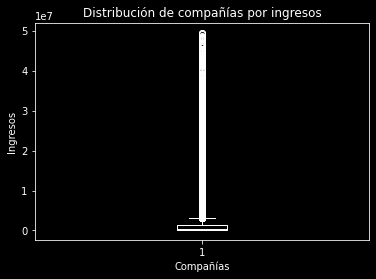

In [20]:
# Now let's visualize the same income distribution but with no outliers
plt.boxplot(df_no_out['INGRESOS POR VENTA2020'])
plt.xlabel("Compañías")
plt.ylabel("Ingresos")
plt.title("Distribución de compañías por ingresos")

It's better but it's bad. This is due to having a very big standard deviation in the income values as given by the SUPERCIAS data set.

### Outlier Analysis

In [21]:
# Let's take a look at the positive outliers (those with a bigger than 3 z-score)
df_pos_out = df[ df['income_zscore'] > 3 ]

In [22]:
# Let's see how many positive outliers we have
df_pos_out.shape[0]

288

In [23]:
# Let's check the mean and std as well as typical cetral tendency measures
df_pos_out['INGRESOS POR VENTA2020'].describe()

count    2.880000e+02
mean     1.559265e+08
std      2.059239e+08
min      4.998650e+07
25%      6.480444e+07
50%      9.102075e+07
75%      1.479454e+08
max      2.170603e+09
Name: INGRESOS POR VENTA2020, dtype: float64

In [24]:
# Now, let's compare those measurements to the negative outliers
df[ df['income_zscore'] < -3].shape[0]

0

There are some interesting implications about the dataset not having any negative outliers (more in Preliminary Observations section).

In [27]:
# Finally let's check how much percentage of income is earned byt the positive outliers in comparison to ALL other companies
df_pos_out_income = df_pos_out['INGRESOS POR VENTA2020'].sum()
df_no_out_income = df_no_out['INGRESOS POR VENTA2020'].sum()
df_total_income = df['INGRESOS POR VENTA2020'].sum()
out_income_percentaje = (df_pos_out_income / df_total_income) *100
out_income_percentaje

35.98524082457054

## Preliminary observations

### Preliminary thoughs

After exploring the data set, we can conclude that, in it, there is a heavily squewed distribution when it comes to profits for companies; where less than 10% of the companies are above the mean, but the amount of profit they generate is big enough in value that it pulls the mean upwards significantly.

The disparity of income is evidenced not only by what's discussed above but also because of how disperse is de data. There's a standard deviation of $16,163,692.45 (pretty big). 

Another interesting insight is that there are NO negative outliers (values with less than -3 with a z-score) while there are 288 positive outliers. This in conjunction with what we are discussing about the squewed distribution mean that most companies lie at the bottom of income values but the top companies win a disproportionate amount in comparison when it comes to the Dataset. This is to be expected in most markets. We confirmed this by seeing how 35.99% of ALL income comes from the positive outliers.

While it might be tempting to simply get rid of outliers this might very well prove to be a mistake. Getting rid of the top companies to minimize the bias might not be the best solutions since we are going to loose to top players (bigger companies, significant actors, etc) in the workforce according to SUPERCIAS.